# Data visualization using Python
##### * Working with New York Taxis data [NYC Taxi and Limousine Commission (TLC)]
##### * This notebook was created during the course Data Science and Applied Machine Learning with Python of Mathesis MOOC

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file =  "nyc_taxi_trip_data_sample.csv.zip"
# os.chdir("Downloads")
data = pd.read_csv(file, parse_dates=["pickup_datetime", "dropoff_datetime"])

In [4]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [5]:
data.shape

(1731797, 14)

In [6]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731767e+06,1.731767e+06
mean,1.033927e+00,1.707519e+00,8.110141e+02,3.458005e+00,-7.244724e+01,3.974714e+01,-7.240237e+01,3.972352e+01
std,4.174030e-01,1.373835e+00,1.561974e+04,7.221295e+02,1.122722e+01,8.509423e+00,1.134113e+01,8.562259e+00
min,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,-7.400217e+02,-3.117494e+03,-1.800000e+02,-3.114296e+03
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.040000e+00,-7.399218e+01,4.073443e+01,-7.399147e+01,4.073352e+01
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.800000e+00,-7.398184e+01,4.075238e+01,-7.398027e+01,4.075280e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396687e+01,4.076700e+01,-7.396362e+01,4.076778e+01
max,2.100000e+02,7.000000e+00,4.294941e+06,9.500000e+05,5.197732e+01,7.400267e+01,8.431574e+01,7.401300e+01


In [7]:
data.isna().sum()

medallion                  0
hack_license               0
vendor_id                  0
rate_code                  0
store_and_fwd_flag    865101
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_time_in_secs          0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude         30
dropoff_latitude          30
dtype: int64

In [8]:
data.pickup_latitude.min(), data.pickup_latitude.max(), data.pickup_longitude.min(), data.pickup_longitude.max()

(-3117.4944, 74.00267, -740.02167, 51.977318)

#### According to google maps the Latitude of New York is between 40.4961 and 45.0154 and the Longitude between -79.7624 and -71.8563

In [9]:
data = data[(data["pickup_latitude"] <= 45.0154) & (data["pickup_latitude"] >= 40.4961) 
            & 
                 (data["pickup_longitude"] >= -79.7624) & (data["pickup_longitude"] <= -71.8563)
            &
                 (data["dropoff_latitude"] <= 45.0154) & (data["dropoff_latitude"] >= 40.4961) 
            & 
                 (data["dropoff_longitude"] >= -79.7624) & (data["dropoff_longitude"] <= -71.8563)]

In [10]:
data.shape

(1696775, 14)

In [ ]:
data.isna().sum()

##### In order to visualize the takeoff and dropoff points this function turns the data points into coordinates in a way that (0,0) coord is on the botttom left

In [12]:
def mercator(lng, lat):    
    lng_rad = lng * np.pi / 180
    lat_rad = lat * np.pi / 180
    x = (256/(2*np.pi))*(lng_rad + np.pi)
    y = (256/(2*np.pi))*(np.log(np.tan(np.pi/4 + lat_rad/2)))
    return (x, y)

##### Data visualization as in a map of New York according to the pickup points

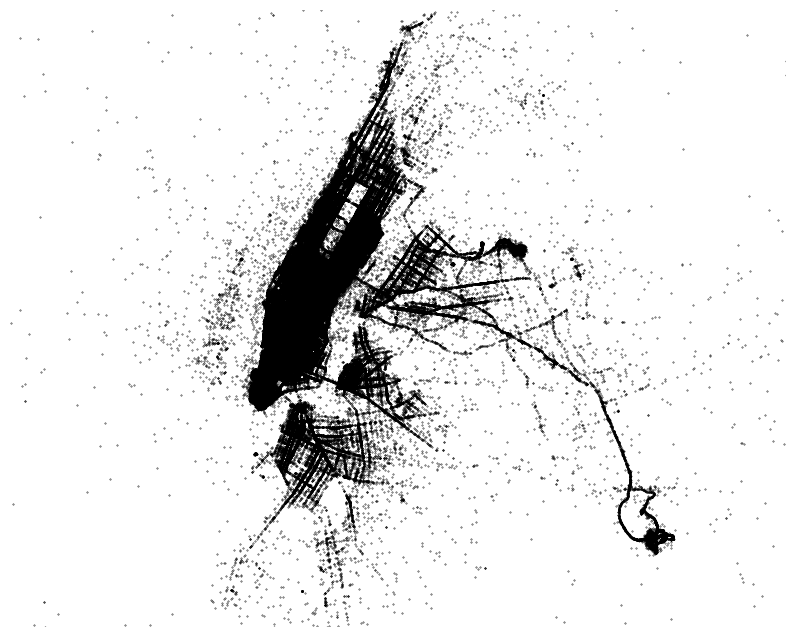

In [15]:
px, py = mercator(data["pickup_longitude"], data["pickup_latitude"])
plt.figure(figsize=(10,8))
plt.axis("equal")
plt.axis("off")
plt.xlim(75.3, 75.55)
plt.ylim(31.65, 31.90)
plt.gca().set_facecolor('white')
_ = plt.scatter(px, py, s=.1, color='black')

##### Data visualization as in a map of New York according to the dropoff points

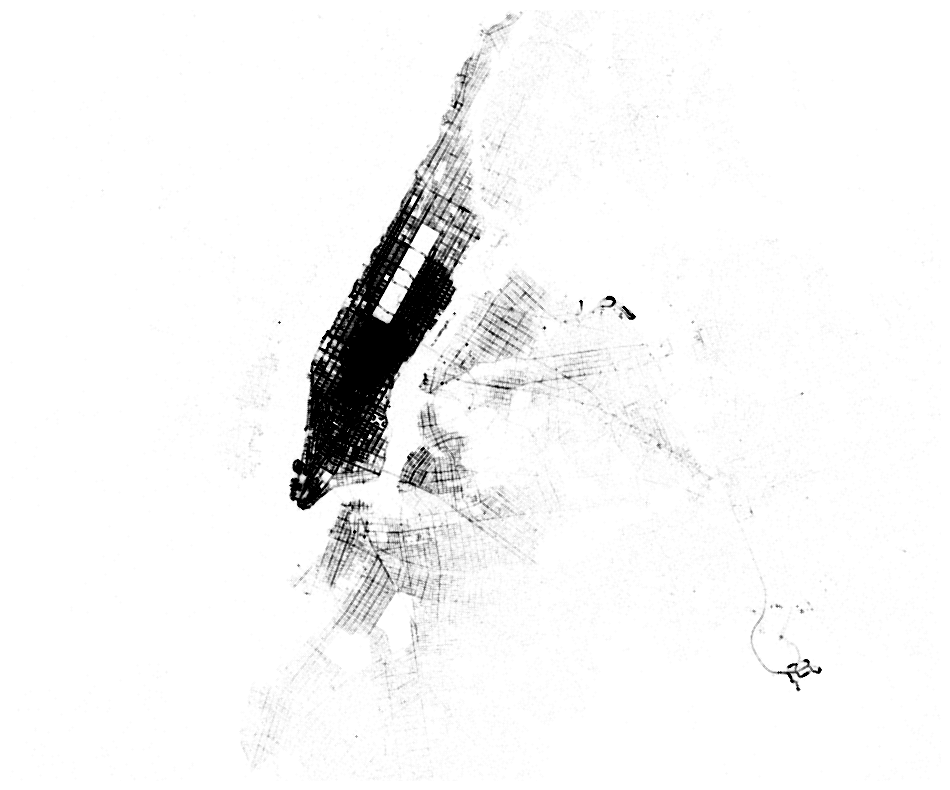

In [13]:
px, py = mercator(data["dropoff_longitude"], data["dropoff_latitude"])
plt.figure(figsize=(12,10))
plt.axis("equal")
plt.axis("off")
plt.xlim(75.3, 75.55)
plt.ylim(31.65, 31.90)
plt.gca().set_facecolor('white')
_ = plt.scatter(px, py, s=.1, alpha=.03, color='black')

#### finding the most frequent observations of the trip_distance columns

In [16]:
data_for_peaks = data.trip_distance.value_counts(bins=np.linspace(0,10,100)).sort_index()
from scipy.signal import find_peaks
peaks, _ = find_peaks(data_for_peaks)

In [17]:
data_for_peaks.iloc[peaks]

(0.909, 1.01]     77181
(1.919, 2.02]     46134
(2.929, 3.03]     22679
(3.939, 4.04]     12330
(4.949, 5.051]     7195
(5.96, 6.061]      4657
(6.97, 7.071]      2992
(7.98, 8.081]      2304
(8.384, 8.485]     1978
(8.99, 9.091]      2388
(9.192, 9.293]     2126
(9.495, 9.596]     2105
Name: trip_distance, dtype: int64

#### Visualizing the data according to the peaks
#### The orange lines symbolizing the peaks

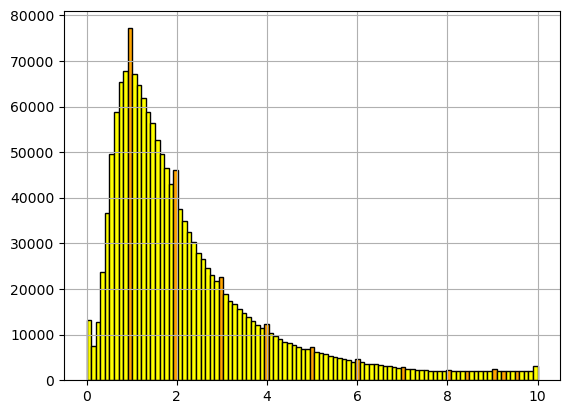

In [18]:
h = data.trip_distance.hist(bins=np.linspace(0,10,100), 
                            color="yellow", 
                            edgecolor="black")
for i in peaks:
    h.patches[i].set_facecolor("orange")

In [19]:
data.pickup_datetime

0         2013-10-04 20:20:00
1         2013-09-27 14:16:04
2         2013-07-18 13:24:37
3         2013-06-25 12:12:00
4         2013-04-19 05:28:00
                  ...        
1731791   2013-09-26 01:41:13
1731792   2013-08-02 03:34:00
1731794   2013-02-16 17:24:00
1731795   2013-05-24 10:29:16
1731796   2013-03-15 14:42:10
Name: pickup_datetime, Length: 1696775, dtype: datetime64[ns]

#### Visualizing the frequency of taxis taken by each day

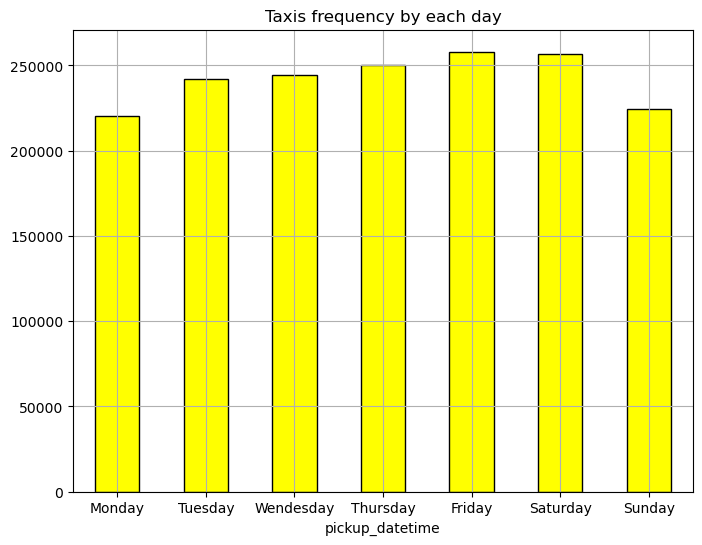

In [24]:
days = data.groupby(data.pickup_datetime.dt.dayofweek)
days_num = days.size()
days_plot = days_num.plot(kind="bar",figsize=(8,6), edgecolor="black", color="yellow")
_ = days_plot.set_xticklabels(['Monday', 'Tuesday', 'Wendesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.title("Taxis frequency by each day")
plt.grid()

#### Visualizing the frequency of taxis taken by each hour of the day

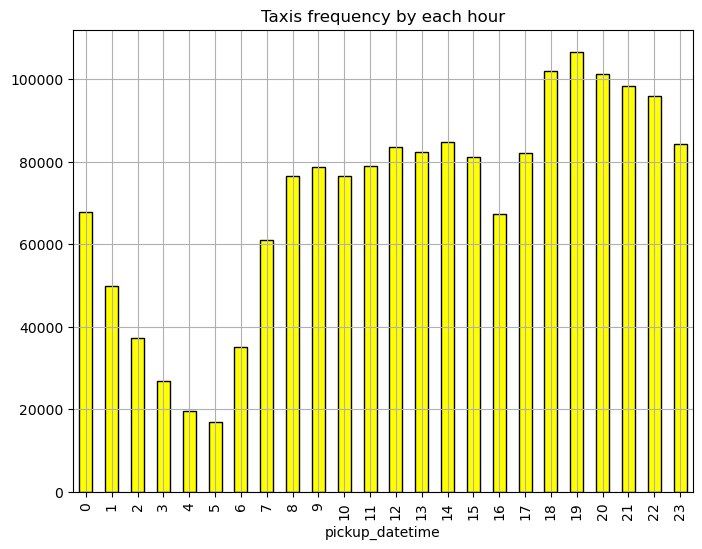

In [21]:
hourly = data.groupby(data.pickup_datetime.dt.hour)
hourly_num = hourly.size()
hourly_num.plot.bar(figsize=(8,6), color="yellow", edgecolor="black")
plt.title("Taxis frequency by each hour")
plt.grid()